In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("C:/Users/ronit/Downloads/Heamanth.csv")


In [3]:
# check the shape of data
dataset.shape

(10578, 47)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     10578 non-null  object 
 1   country       10578 non-null  object 
 2   device_brand  9503 non-null   object 
 3   is_organic    10578 non-null  int64  
 4   var_01        10578 non-null  int64  
 5   var_02        10578 non-null  int64  
 6   var_03        10578 non-null  int64  
 7   var_04        10578 non-null  int64  
 8   var_05        10578 non-null  int64  
 9   var_06        10578 non-null  int64  
 10  var_07        10578 non-null  int64  
 11  var_08        10578 non-null  int64  
 12  var_09        10578 non-null  float64
 13  var_10        10578 non-null  int64  
 14  var_11        10578 non-null  int64  
 15  var_12        10578 non-null  int64  
 16  var_13        10578 non-null  int64  
 17  var_14        10578 non-null  int64  
 18  var_15        10578 non-nu

In [5]:
# sample 30% of data to be used as unseen data
data = dataset.sample(frac=0.70, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (7405, 47)
Unseen Data For Predictions: (3173, 47)


In [6]:
pip install scikit-learn==0.23.2

Note: you may need to restart the kernel to use updated packages.


In [12]:
from pycaret.classification import *
s = setup(data = dataset, target = 'revenue_d30', session_id=123)

,Description,Value
0,session_id,123
1,Target,revenue_d30
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10578, 47)"
5,Missing Values,True
6,Numeric Features,29
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9483,0.8594,0.1944,0.6609,0.2954,0.2772,0.3359,44.8520
lightgbm,Light Gradient Boosting Machine,0.9475,0.8768,0.2250,0.6155,0.3262,0.3051,0.3486,2.0390
ridge,Ridge Classifier,0.9433,0.0000,0.0331,0.4833,0.0614,0.0554,0.1155,58.3330
et,Extra Trees Classifier,0.9431,0.8358,0.0024,0.1000,0.0047,0.0044,0.0150,9.9620
dummy,Dummy Classifier,0.9430,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1370
rf,Random Forest Classifier,0.9429,0.8580,0.0047,0.2000,0.0092,0.0079,0.0271,5.4940
ada,Ada Boost Classifier,0.9423,0.8798,0.1801,0.4963,0.2597,0.2367,0.2720,12.6200
lr,Logistic Regression,0.9400,0.6471,0.1138,0.4108,0.1757,0.1551,0.1911,52.6280
knn,K Neighbors Classifier,0.9379,0.6523,0.0356,0.2116,0.0602,0.0454,0.0655,14.0040
dt,Decision Tree Classifier,0.9365,0.6134,0.2488,0.4080,0.3051,0.2743,0.2853,5.1540


In [14]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
gbc= create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9460,0.8226,0.1667,0.5833,0.2593,0.2401,0.2922
1,0.9568,0.9231,0.3333,0.7778,0.4667,0.4479,0.4921
2,0.9487,0.9044,0.2093,0.6923,0.3214,0.3026,0.3625
3,0.9393,0.7999,0.1395,0.4286,0.2105,0.1874,0.2199
4,0.9527,0.9165,0.3095,0.6842,0.4262,0.4052,0.4402
5,0.9486,0.8614,0.1190,0.8333,0.2083,0.1969,0.3035
6,0.9486,0.8495,0.1667,0.7000,0.2692,0.2529,0.3254
7,0.9527,0.8902,0.2143,0.8182,0.3396,0.3237,0.4042
8,0.9419,0.7828,0.1190,0.4545,0.1887,0.1691,0.2112


In [16]:
# trained model object is stored in the variable 'dt'. 
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [17]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9433,0.8511,0.2143,0.5000,0.3000,0.2754,0.3025
1,0.9460,0.9111,0.2857,0.5455,0.3750,0.3497,0.3698
2,0.9514,0.9063,0.2326,0.7692,0.3571,0.3393,0.4065
3,0.9379,0.8433,0.2093,0.4286,0.2813,0.2528,0.2707
4,0.9500,0.9097,0.3571,0.6000,0.4478,0.4233,0.4390
5,0.9473,0.8431,0.2143,0.6000,0.3158,0.2947,0.3377
6,0.9486,0.8616,0.2619,0.6111,0.3667,0.3443,0.3783
7,0.9486,0.9020,0.2143,0.6429,0.3214,0.3016,0.3518
8,0.9405,0.7988,0.2381,0.4545,0.3125,0.2846,0.3009


In [18]:
# tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


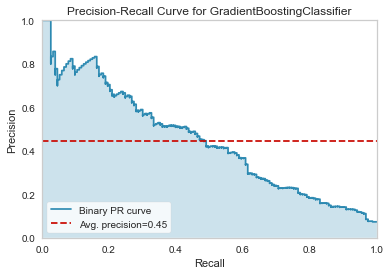

In [19]:
plot_model(tuned_gbc, plot = 'pr')

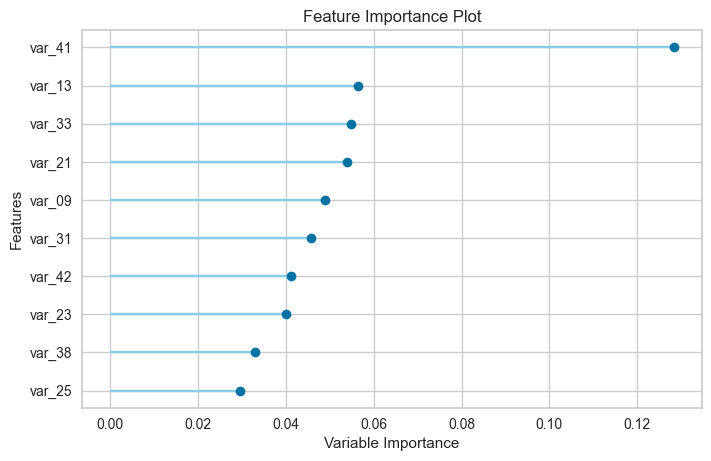

In [20]:
plot_model(tuned_gbc, plot='feature')

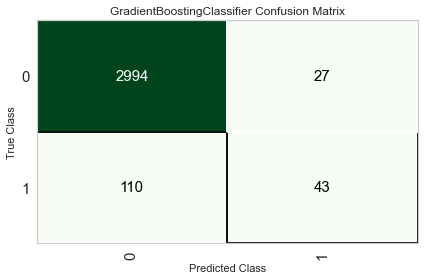

In [21]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [22]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# finalize gbc model
final_gbc = finalize_model(tuned_gbc)

In [23]:
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9568,0.9033,0.2810,0.6143,0.3857,0.3665,0.3969


In [25]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9460,0.8880,0.2143,0.5625,0.3103,0.2881,0.3250
1,0.9460,0.9267,0.2381,0.5556,0.3333,0.3099,0.3404
2,0.9501,0.8934,0.2791,0.6667,0.3934,0.3719,0.4108
3,0.9393,0.8482,0.2093,0.4500,0.2857,0.2584,0.2792
4,0.9527,0.9084,0.2857,0.7059,0.4068,0.3867,0.4302
5,0.9446,0.8475,0.0952,0.5714,0.1633,0.1495,0.2174
6,0.9527,0.8626,0.2619,0.7333,0.3860,0.3671,0.4206
7,0.9514,0.9014,0.2619,0.6875,0.3793,0.3592,0.4052
8,0.9378,0.8329,0.1667,0.3889,0.2333,0.2063,0.2267


In [26]:
tuned_lightgbm= tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9447,0.8951,0.1905,0.5333,0.2807,0.2586,0.2963
1,0.9487,0.9191,0.2619,0.6111,0.3667,0.3444,0.3783
2,0.9514,0.9235,0.2093,0.8182,0.3333,0.3172,0.3991
3,0.9406,0.8243,0.2093,0.4737,0.2903,0.2642,0.2884
4,0.9486,0.9192,0.2857,0.6000,0.3871,0.3638,0.3913
5,0.9446,0.8622,0.0714,0.6000,0.1277,0.1170,0.1936
6,0.9527,0.8864,0.2381,0.7692,0.3636,0.3461,0.4118
7,0.9514,0.9071,0.1905,0.8000,0.3077,0.2922,0.3760
8,0.9432,0.8178,0.1667,0.5000,0.2500,0.2281,0.2660


In [27]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# finalize lightgbm model
final_lightgbm = finalize_model(tuned_lightgbm)

In [28]:
###Ensemble of models 
gbc_bagged = ensemble_model(gbc,method='Bagging')
tuned_lightgbm =ensemble_model(tuned_lightgbm,method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9447,0.8904,0.1667,0.5385,0.2545,0.2340,0.2784
1,0.9501,0.9273,0.2857,0.6316,0.3934,0.3712,0.4033
2,0.9487,0.9270,0.1860,0.7273,0.2963,0.2793,0.3514
3,0.9393,0.8403,0.1163,0.4167,0.1818,0.1606,0.1968
4,0.9486,0.9241,0.2143,0.6429,0.3214,0.3016,0.3518
5,0.9446,0.8627,0.0476,0.6667,0.0889,0.0819,0.1682
6,0.9500,0.8871,0.1667,0.7778,0.2745,0.2597,0.3458
7,0.9459,0.9219,0.0952,0.6667,0.1667,0.1547,0.2383
8,0.9459,0.8303,0.1429,0.6000,0.2308,0.2136,0.2748


In [29]:
###Blending Models 
blend_lightgbm_gbm = blend_models(estimator_list=[tuned_lightgbm,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9447,0.8772,0.1905,0.5333,0.2807,0.2586,0.2963
1,0.9514,0.9319,0.2619,0.6875,0.3793,0.3593,0.4053
2,0.9487,0.9286,0.1860,0.7273,0.2963,0.2793,0.3514
3,0.9393,0.8332,0.1395,0.4286,0.2105,0.1874,0.2199
4,0.9486,0.9302,0.2143,0.6429,0.3214,0.3016,0.3518
5,0.9459,0.8759,0.0714,0.7500,0.1304,0.1218,0.2209
6,0.9473,0.8864,0.1429,0.6667,0.2353,0.2197,0.2925
7,0.9486,0.9184,0.1429,0.7500,0.2400,0.2259,0.3132
8,0.9459,0.8237,0.1667,0.5833,0.2593,0.2401,0.2922


In [30]:
evaluate_model(blend_lightgbm_gbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…